# <font style="color:rgb(50,129,229)">Application - Image Sharpening</font>

In sharpening we want to enhance the edges and bring out more of the underlying texture. Although, sharpening can be performed using a single convolution filter, it is easy to understand it in terms an old photo enhancement technique called **unsharp** **masking**. This technique was developed back in the 1930s in Germany. It is fascinating to see the hacks people used back in those days to get a good photo. Wikipedia has the [story](https://en.wikipedia.org/wiki/Unsharp_masking).

Fortunately, it is much easier for us to achieve unsharp masking digitally. 

1. **Step 1**: Blur the image to smooth out texture. The blurred image contains low frequency information of the original image. Let $I$ be the original image and $I_b$ be the blurred image. 

2. **Step 2**: Obtain the high frequency information of the original image by subtracting the blurred image from the original image. 

3. **Step 3**: Now, put back the high frequency information back in the image and control the amount using a parameter. The final sharpened image is therefore, 

    $$I_s = I + \alpha  ( I − I_b) $$

The figure below shows the three stages of unsharp masking

| <center><img src="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.2-originalGray.png" width =330 /></center> | <center><img src="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.2-BlurredImage.png" width=330 /></center> | <center><img src="https://www.learnopencv.com/wp-content/uploads/2017/12/opcv4face-w2-m3.2-SharpenedImage.png" width=330/></center> |
| -------- | -------- | -------- |
| <center>Original Image</center>    | <center>Blurred Image</center>     | <center>Sharpened Image</center>     |

In practice, sharpening is implemented using a simple sharpening kernel that approximates the above behavior. All you need to do is convolve the image with the following kernel


$$
\begin{bmatrix}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{bmatrix}
$$


The above kernel is obtained using $\alpha=1$ and approximating $(I-I_b)$ using the Laplacian kernel. 

$$
\begin{bmatrix}
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0
\end{bmatrix}
\quad
\quad
-
\quad
\quad
\begin{bmatrix}
0 & 1 & 0\\
1 & -4 & 1\\
0 & 1 & 0
\end{bmatrix}
$$

### <font style="color:rgb(8,133,37)">Image Sharpening using kernel</font>

The following tutorial implements image sharpening as a simple convolution operation.

In [1]:
import cv2
import numpy as np
DATA_PATH = './data/'
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename = DATA_PATH+"images/sample.jpg"

image = cv2.imread(filename)

if image is None:
    print("Image not read")

The sharpening kernel is defined using double as the datatype so as to prevent overflow.

### <font style="color:rgb(8,133,37)">Define the Kernel </font>

In [3]:
# Sharpen kernel
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

Next, `filter2D` is used to perform the convolution.

The third parameter (depth) is set to `-1` which means the bit-depth of the output image is the same as the input image. So if the input image is of type `CV_8UC3`, the output image will also be of the same type.

### <font style="color:rgb(8,133,37)">Apply convolution </font>

Text(0.5, 1.0, 'Sharpening Result')

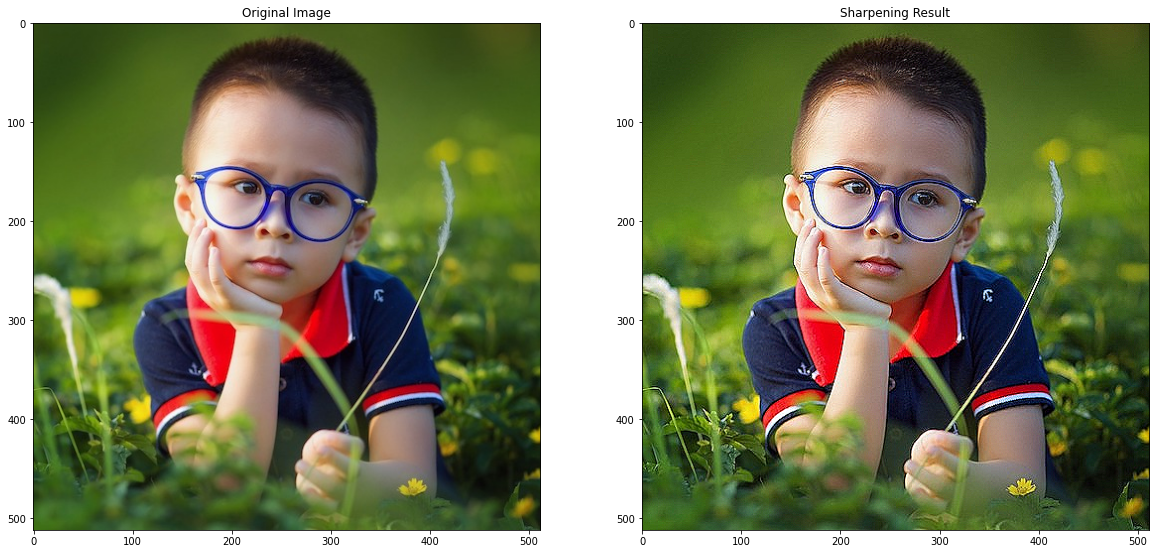

In [4]:
# Using 2D filter by applying the sharpening kernel
sharpenOutput = cv2.filter2D(image, -1, sharpen)

plt.figure(figsize=[20,10])
plt.subplot(121);plt.imshow(image[...,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(sharpenOutput[...,::-1]);plt.title("Sharpening Result")

You can observe how the result of sharpening accentuates the high frequency components ( edges, hariline etc ).